Python version in use

In [1]:
import platform
print(platform.python_version())

3.6.4



# Solving Sentiment Analysis with an ML-based Appoach

# # Implementing an ML-based Approach Using Naive Bayes

Liraries

In [2]:
import nltk
#nltk.download()

Uploading reviews

In [3]:
positiveReview = "C:\\Users\\praveen ji\\Desktop\\requiredDoc\\PyCode\\Dataset\\rt-polaritydata\\rt-polaritydata\\rt-polarity.pos"
with open(positiveReview,'r') as f:
    positiveReviews = f.readlines()

In [4]:
negativeReview = "C:\\Users\\praveen ji\\Desktop\\requiredDoc\\PyCode\\Dataset\\rt-polaritydata\\rt-polaritydata\\rt-polarity.neg"
with open(negativeReview,'r') as f:
    negativeReviews = f.readlines()

1.1 Split Corpus into Training and Test Data 

Use rows 0-2500 to train our classifier, then test it with rows 2501-330.

In [5]:
SplitIndex = 2500

In [6]:
testNegativeReviews = negativeReviews[SplitIndex+1:]

In [7]:
testPositiveReviews = positiveReviews[SplitIndex+1:]

In [8]:
trainingNegativeReviews = negativeReviews[:SplitIndex]

In [9]:
trainingPositiveReviews = positiveReviews[:SplitIndex]

1.2 Define Vocabulary of Training Data

A list in which each word in the training data occurs exactly once

In [10]:
positiveWordList = [word for line in trainingPositiveReviews for word in line.split()]

In [11]:
negativeWordList = [word for line in trainingNegativeReviews for word in line.split()]

In [12]:
allWordList = [item for sublist in [positiveWordList,negativeWordList] for item in sublist]

In [13]:
vocabulary = list(set(allWordList))

1.3 Feature Extraction

A function that takes in a review and returns a feature vector

In [14]:
def extract_features(review):
    review_words = set(review)
    features = {}
    for word in vocabulary:
        features[word] = (word in review_words)
    return features

1.4 Setting up the training data

A list of tuples: first element in each tuple is the review, second element is the label

In [15]:
negTaggedTrainReviewList=[{'review': oneReview.split(),'label':'negative'} for oneReview in trainingNegativeReviews]
posTaggedTrainReviewList=[{'review': oneReview.split(),'label':'positive'} for oneReview in trainingPositiveReviews]

fullTaggedTrainingData =[item for sublist in[negTaggedTrainReviewList,posTaggedTrainReviewList] for item in sublist]
trainingData = [(review['review'],review['label']) for review in fullTaggedTrainingData]

In [16]:
#Feature Extraction : Input training data and a function object, output is correct feature vector for
trainingFeatures= nltk.classify.apply_features(extract_features, trainingData)

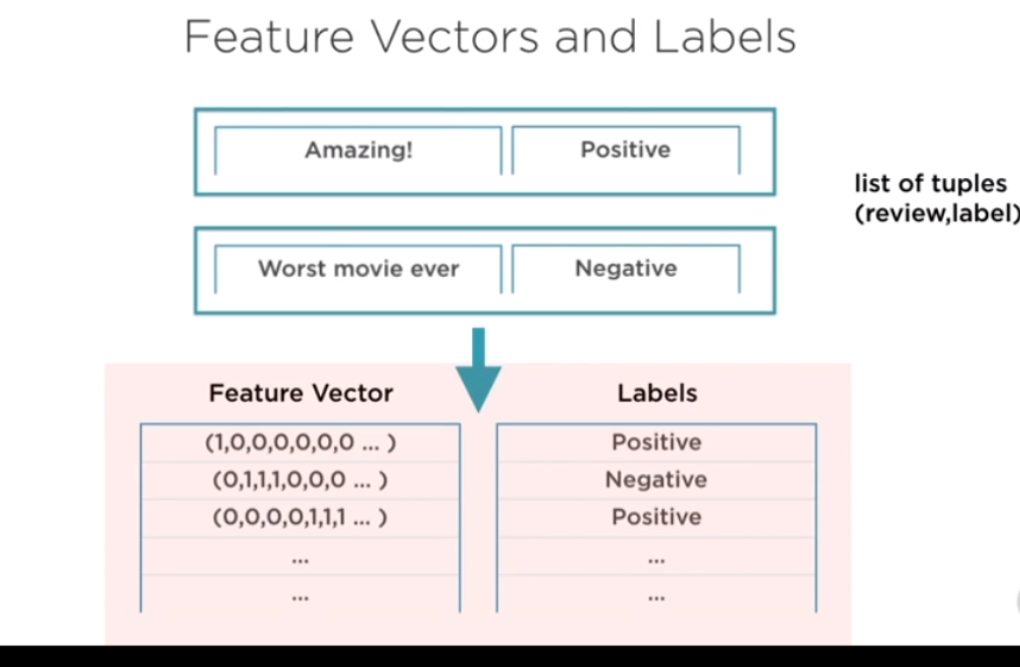

In [20]:
from IPython.display import Image
Image(filename='FeatureVector.png') 

In [18]:
#Training the classifier
#Input feature vectors and labels, output is ready to use classifier

trainedClassifier = nltk.NaiveBayesClassifier.train(trainingFeatures)

1.5 Classify the test data

Input a feature vector, output is an assigned label

In [21]:
#Using the classifier
def naiveBayesSentimentCalculator(review):
    problemInstance = review.split()
    problemFeatures = extract_features(problemInstance)
    return trainedClassifier.classify(problemFeatures)

In [22]:
# Verify
naiveBayesSentimentCalculator("what an awesome movie")

'positive'

In [27]:
# Verify
naiveBayesSentimentCalculator("what a nice movie but worst cast")

'positive'

In [36]:
def getTestReviewSentiments(naiveBayesSentimentCalculator):
    testNegativeResults = [naiveBayesSentimentCalculator(review) for review in testNegativeReviews ]
    testPositiveResults = [naiveBayesSentimentCalculator(review) for review in testPositiveReviews ]
    labelToNum = {'positive' : 1, 'negative' : -1}
    numericNegResults = [labelToNum[x] for x in testNegativeResults]
    numericPosResults = [labelToNum[x] for x in testPositiveResults]
    return {'results-on-positive' : numericPosResults, 'results-on-negative' : numericNegResults}

In [37]:
def runDiagnostics(reviewResult):
    positiveReviewsResult = reviewResult['results-on-positive']
    negativeReviewsResult = reviewResult['results-on-negative']
    
    pctTruePositive = float(sum(x>0 for x in positiveReviewsResult))/len(positiveReviewsResult)
    pctTrueNegative = float(sum(x<0 for x in negativeReviewsResult))/len(negativeReviewsResult)
    
    totalAccurate = float(sum(x>0 for x in positiveReviewsResult))+ float(sum(x<0 for x in negativeReviewsResult))
    
    total = len(positiveReviewsResult) +len(negativeReviewsResult)
    
    print ("Accuracy on positive reviews = " + "%.2f" % (pctTruePositive*100) + "%")
    print ("Accuracy on negative reviews = " + "%.2f" % (pctTrueNegative*100) + "%")
    print ("Accuracy Overall = " + "%.2f" % (totalAccurate*100/ total) + "%")
    

In [38]:
runDiagnostics(getTestReviewSentiments(naiveBayesSentimentCalculator))

Accuracy on positive reviews = 73.39%
Accuracy on negative reviews = 77.07%
Accuracy Overall = 75.23%
